# 11. 데이터 분석 및 시각화하기

데이터 수집 및 정리가 끝났다면, 내가 가지고 있는 데이터가 어떠한 특성을 가지고 있는지에 대한 분석 및 시각화 과정, 즉 **탐색적 데이터 분석(Exploratory Data Analysis)**을 할 필요가 있습니다. 이 과정을 통해 데이터를 더 잘 이해할 수 있으며, 극단치나 결측치 등 데이터가 가지고 있는 잠재적인 문제를 발견하고 이를 어떻게 처리할지 고민할 수 있습니다.

이번 장에서는 데이터 분석 및 시각화에 대해 알아보겠습니다.

## 11.1 종목정보 데이터 분석

먼저 거래소를 통해 수집한 산업별 현황과 개별지표를 정리한 파일, WICS 기준 섹터 지표를 정리한 파일을 통해 국내 상장종목의 데이터를 분석해보겠습니다.

In [1]:
import pandas as pd
import numpy as np

KOR_ticker = pd.read_csv('data/KOR_ticker.csv', index_col=0)
KOR_ticker['종목코드'] = KOR_ticker['종목코드'].astype(np.str).str.zfill(6)

KOR_sector = pd.read_csv('data/KOR_sector.csv', index_col=0)
KOR_sector['CMP_CD'] = KOR_sector['CMP_CD'].astype(np.str).str.zfill(6)

각 파일을 불러온 후 티커에 해당하는 종목코드와 CMP_CD 열을 6자리 숫자로 만들어줍니다. 이제 파이썬에서 대표적인 데이터 분석 패키지인 pandas를 이용해 데이터를 분석해보겠습니다.

### 11.1.1 데이터 합치기

두 테이블을 하나로 합치기 위해 `merge()` 함수를 이용합니다. 데이터를 합치는 방법은 {numref}`eda_merge`와 같이 크게 네가지 종류가 있습니다.


```{figure} image/eda_merge.png
---
name: eda_merge
---
merge 종류
```

이 중 거래소 티커 기준으로 데이터를 맞추기 위해 left를 기준으로 두 데이터를 합치겠습니다.

In [2]:
data_market = pd.merge(KOR_ticker, KOR_sector, left_on = ['종목코드','종목명'], right_on = ['CMP_CD','CMP_KOR'], how = 'left')

data_market.head()

,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액,EPS,PER,...,CMP_KOR,MKT_VAL,WGT,S_WGT,CAL_WGT,SEC_CD,SEC_NM_KOR,SEQ,TOP60,APT_SHR_CNT
0,005930,삼성전자,KOSPI,전기전자,83200,-400,-0.48,496685908160000,3166.0,26.28,...,삼성전자,372514431.0,60.03,60.03,1.0,G45,IT,1.0,0.0,4.477337e+09
1,000660,SK하이닉스,KOSPI,전기전자,137500,-2500,-1.79,100100325187500,2943.0,46.72,...,SK하이닉스,74074241.0,11.94,71.96,1.0,G45,IT,2.0,0.0,5.387218e+08
2,035420,NAVER,KOSPI,서비스업,385500,2000,0.52,63323538772500,4006.0,96.23,...,NAVER,49392360.0,32.00,32.00,1.0,G50,커뮤니케이션서비스,1.0,3.0,1.281254e+08
3,051910,LG화학,KOSPI,화학,817000,5000,0.62,57673944231000,4085.0,200.00,...,LG화학,36911324.0,29.87,29.87,1.0,G15,소재,1.0,6.0,4.517910e+07
4,207940,삼성바이오로직스,KOSPI,의약품,782000,12000,1.56,51741030000000,3067.0,254.97,...,삼성바이오로직스,12935258.0,8.71,30.59,1.0,G35,건강관리,2.0,19.0,1.654125e+07


In [3]:
data_market.tail()

,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액,EPS,PER,...,CMP_KOR,MKT_VAL,WGT,S_WGT,CAL_WGT,SEC_CD,SEC_NM_KOR,SEQ,TOP60,APT_SHR_CNT
2191,121890,에스디시스템,KOSDAQ,정보기기,739,0,0.00,7101198800,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2192,114570,지스마트글로벌,KOSDAQ,반도체,620,0,0.00,7030424280,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2193,080440,에스제이케이,KOSDAQ,유통,498,0,0.00,6636328080,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2194,158310,스타모빌리티,KOSDAQ,기계·장비,505,0,0.00,6096179210,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2195,028040,미래SCI,KOSDAQ,유통,6,-11,-64.71,269877012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`merge()` 함수를 이용해 KOR_ticker와 KOR_sector 데이터를 합쳐줍니다. 왼쪽(KOR_ticker)의 종목코드와 종목명이 오른쪽(KOR_sector)의 CMP_CD와 CMP_KOR에 각각 대응되므로 left_on 및 right_on에 이를 입력해주며, 합치는 방법으로 left를 입력해줍니다. 소형주의 경우 KOR_sector에 해당종목의 정보가 없어, NA가 생성됩니다.

### 11.1.2 열 이름 바꾸기

In [4]:
data_market.columns

Index(['종목코드', '종목명', '시장구분', '업종명', '종가', '대비', '등락률', '시가총액', 'EPS', 'PER',
       'BPS', 'PBR', '주당배당금', '배당수익률', 'IDX_CD', 'IDX_NM_KOR', 'ALL_MKT_VAL',
       'CMP_CD', 'CMP_KOR', 'MKT_VAL', 'WGT', 'S_WGT', 'CAL_WGT', 'SEC_CD',
       'SEC_NM_KOR', 'SEQ', 'TOP60', 'APT_SHR_CNT'],
      dtype='object')

열 이름 중에 '배당수익률'이 있습니다. 이를 '배당수익률(%)'로 바꿔주도록 하겠습니다.

In [5]:
data_market = data_market.rename(columns = {'배당수익률':'배당수익률(%)'})

data_market.columns

Index(['종목코드', '종목명', '시장구분', '업종명', '종가', '대비', '등락률', '시가총액', 'EPS', 'PER',
       'BPS', 'PBR', '주당배당금', '배당수익률(%)', 'IDX_CD', 'IDX_NM_KOR',
       'ALL_MKT_VAL', 'CMP_CD', 'CMP_KOR', 'MKT_VAL', 'WGT', 'S_WGT',
       'CAL_WGT', 'SEC_CD', 'SEC_NM_KOR', 'SEQ', 'TOP60', 'APT_SHR_CNT'],
      dtype='object')

`rename()` 함수 내에 딕셔너리 형태로 {'old name':'new name'}을 입력하면 열 이름이 바뀌게 됩니다.

### 11.1.3 고유한 값 확인

In [6]:
data_market['SEC_NM_KOR'].unique()

array(['IT', '커뮤니케이션서비스', '소재', '건강관리', '경기관련소비재', '에너지', '산업재', '금융',
       '유틸리티', '필수소비재', nan], dtype=object)

먼저 `unique()` 함수는 해당 열의 고유한 값을 반환합니다. 데이터의 섹터 정보를 확인해보면, WICS 기준 10개 섹터 및 섹터 정보가 없는 종목인 NA 값이 있습니다.

In [7]:
data_market['SEC_NM_KOR'].value_counts(dropna = False)

IT           560
산업재          349
경기관련소비재      336
건강관리         273
소재           229
NaN          118
커뮤니케이션서비스    111
필수소비재         99
금융            76
에너지           25
유틸리티          20
Name: SEC_NM_KOR, dtype: int64

`value_counts()` 함수는 고유한 값별로 개수를 세며, dropna를 False로 지정할 경우 NA 값도 포함됩니다. 우리나라 종목들의 섹터 정보를 확인해보면 IT 섹터에 포함된 종목이 압도적으로 많습니다. 

In [8]:
data_market['SEC_NM_KOR'].value_counts(normalize = True, dropna = False)

IT           0.255009
산업재          0.158925
경기관련소비재      0.153005
건강관리         0.124317
소재           0.104281
NaN          0.053734
커뮤니케이션서비스    0.050546
필수소비재        0.045082
금융           0.034608
에너지          0.011384
유틸리티         0.009107
Name: SEC_NM_KOR, dtype: float64

normalize를 True로 지정하면, 값들이 비율로 계산됩니다. 

### 11.1.4 열 만들기

기존에 존재하는 데이터를 통해 새로운 열을 만들어 보도록 하겠습니다. 먼저, PBR과 PER의 관계를 이용하면 ROE를 계산할 수 있습니다.

$$ \frac{PBR}{PER} = \frac{\frac{Price}{BPS}}{\frac{Price}{EPS}} = \frac{Price\ \times\ EPS}{Price\ \times\ BPS} = \frac{EPS}{BPS} = ROE$$

또한 시가총액에 중앙값(median)보다 위면 대형주, 낮으면 소형주로 구분할 수 있습니다. 이를 이용해 ROE 및 size 열을 생성하도록 하겠습니다.

In [9]:
data_market['ROE'] = data_market['PBR'] / data_market['PER']
data_market['size'] = np.where(data_market['시가총액'] >= data_market['시가총액'].median(), 'big', 'small')

data_market.loc[:, ['종목명', 'ROE', 'size']].head()

,종목명,ROE,size
0,삼성전자,0.084475,big
1,SK하이닉스,0.044735,big
2,NAVER,0.113686,big
3,LG화학,0.018800,big
4,삼성바이오로직스,0.046594,big


먼저 PBR을 PER로 나눈 ROE에 해당하는 열을 만들어 줍니다. 그 후, numpy의 `where()` 함수를 통해 시가총액이 median 보다 크면 big, 아니면 small에 해당하는 size 열을 만들어 줍니다.

### 11.1.5 조건을 충족하는 종목 선택

필터를 이용해 내가 원하는 조건에 해당하는 종목을 선택할 수도 있습니다. 먼저 PBR이 1 미만인 기업을 선택해보겠습니다.

In [10]:
data_market.loc[data_market.PBR < 1, ['종목명', 'PBR']].head()

,종목명,PBR
6,현대차,0.89
10,POSCO,0.65
11,현대모비스,0.89
17,KB금융,0.58
21,신한지주,0.47


이번에는 PBR 1 미만, PER 20 미만, ROE 10% 초과인 기업을 선택해보겠습니다.

In [11]:
data_market.loc[(data_market.PBR < 1) & (data_market.PER < 20) & (data_market.ROE > 0.1), ['종목명', 'PBR', 'PER', 'ROE']].head()

,종목명,PBR,PER,ROE
80,GS건설,0.90,8.01,0.112360
103,메리츠증권,0.81,4.98,0.162651
116,신세계,0.70,5.32,0.131579
137,두산인프라코어,0.99,9.15,0.108197
140,메리츠화재,0.87,6.89,0.126270


이러한 필터 조건을 통해 간단하게 종목을 스크리닝 할 수도 있습니다.

### 11.1.6 요약 통계량

In [12]:
data_market[['PBR', 'ROE']].describe()

,PBR,ROE
count,2161.000000,1419.000000
mean,4.102582,0.099866
std,19.260562,0.157896
min,0.020000,0.000088
25%,0.900000,0.035265
50%,1.670000,0.071669
75%,3.300000,0.126348
max,686.210000,4.414634


`describe()` 함수는 요약 통계량을 계산해줍니다. 국내 종목의 PBR를 확인해보면 0에 가까운 극단적인 저PBR 종목부터, 수백에 해당하는 극단적인 고PBR 종목까지 분포하고 있습니다. ROE 역시 저ROE 부터 고ROE 까지 그 차이가 매우 크며, PBR과 ROE의 갯수(count)가 다른 이유는 PER가 없는 종목(적자 종목)의 경우 ROE가 NA로 계산되기 때문입니다.

### 11.1.7 데이터 정렬

In [13]:
data_market.loc[:, ['종목명', 'PBR']].sort_values('PBR').head()

,종목명,PBR
2195,미래SCI,0.02
2192,지스마트글로벌,0.15
627,세아홀딩스,0.18
2188,럭슬,0.18
1767,세원정공,0.19


`sort_values()` 함수는 선택한 열을 기준으로 데이터를 정렬해주며, 기본적으로 오름차순(ascending)으로 정렬을 해줍니다.

In [14]:
data_market.loc[:, ['종목명', 'ROE']].sort_values('ROE', ascending=False).head()

,종목명,ROE
2129,이엠앤아이,4.414634
372,한진중공업,1.754967
1278,제노코,1.746517
865,유일에너테크,0.830023
1023,양지사,0.741007


만일 내림차순으로 정렬을 원할 경우, ascending=False 를 입력해주면 됩니다.

### 11.1.8 순위 계산

In [15]:
data_market['PBR_rank'] = data_market['PBR'].rank(method = 'first')
data_market.loc[:, ['종목명', 'PBR', 'PBR_rank']].sort_values('PBR_rank').head()

,종목명,PBR,PBR_rank
2195,미래SCI,0.02,1.0
2192,지스마트글로벌,0.15,2.0
627,세아홀딩스,0.18,3.0
2188,럭슬,0.18,4.0
1767,세원정공,0.19,5.0


`rank()` 함수는 선택한 열의 순위를 구해줍니다. 기본적으로 오름차순으로 순위를 구하며, method 인자를 first로 입력하면 동점이 존재할 경우 데이터 상에서 먼저 나타나는 관측치부터 순위를 부여합니다.

In [16]:
data_market['ROE_rank'] = data_market['ROE'].rank(ascending = False)
data_market.loc[:, ['종목명', 'ROE', 'ROE_rank']].sort_values('ROE_rank').head()

,종목명,ROE,ROE_rank
2129,이엠앤아이,4.414634,1.0
372,한진중공업,1.754967,2.0
1278,제노코,1.746517,3.0
865,유일에너테크,0.830023,4.0
1023,양지사,0.741007,5.0


만일 내림차순으로 순위를 계산하고자 할 경우, 역시나 ascending = False 를 추가로 입력해줍니다.

### 11.1.9 분위수 계산

In [17]:
data_market['quantile'] = pd.qcut(data_market['PBR'], q = 5, labels = range(1, 6))

data_market.loc[:, ['종목명', 'PBR', 'quantile']].head()

,종목명,PBR,quantile
0,삼성전자,2.22,4
1,SK하이닉스,2.09,3
2,NAVER,10.94,5
3,LG화학,3.76,4
4,삼성바이오로직스,11.88,5


`qcut()` 함수는 분위수를 계산해주며, q 인자를 통해 몇 분위로 나눌지 선택할 수 있습니다. 추가적으로 labels 인자를 입력하면 반환된 구간들에 대한 레이블을 명시합니다.해당 함수 역시 오름차순으로 분위수를 나눕니다.

### 11.1.10 그룹별 계산

In [18]:
data_market.groupby('SEC_NM_KOR')['PBR'].median()

SEC_NM_KOR
IT           2.140
건강관리         3.650
경기관련소비재      1.280
금융           0.770
산업재          1.215
소재           1.125
에너지          1.220
유틸리티         0.535
커뮤니케이션서비스    2.530
필수소비재        1.070
Name: PBR, dtype: float64

`groupby()` 함수는 선택한 열 중 동일한 데이터를 기준으로 데이터를 묶어줍니다. 위 예제에서는 섹터를 나타내는 SEC_NM_KOR 기준으로 데이터를 묶었으며, 각 섹터별 PBR의 median 값을 계산하였습니다.

In [19]:
data_market.groupby(['시장구분', 'SEC_NM_KOR'])['PBR'].median()

시장구분    SEC_NM_KOR
KOSDAQ  IT            2.170
        건강관리          4.300
        경기관련소비재       1.660
        금융            2.170
        산업재           1.480
        소재            1.650
        에너지           1.680
        유틸리티          0.960
        커뮤니케이션서비스     2.960
        필수소비재         1.545
KOSPI   IT            1.740
        건강관리          2.380
        경기관련소비재       0.910
        금융            0.585
        산업재           1.030
        소재            0.965
        에너지           0.720
        유틸리티          0.480
        커뮤니케이션서비스     1.865
        필수소비재         0.950
Name: PBR, dtype: float64

이번에는 예제는 시장과 섹터를 기준으로 데이터를 그룹화한 후 각 그룹별 PBR의 중앙값을 구했습니다. 이처럼 그룹은 하나만이 아닌 원하는 만큼 나눌 수 있습니다.

### 11.1.11 피벗 테이블

In [20]:
pd.pivot_table(
    data_market,              # 데이터프레임
    index = 'SEC_NM_KOR',     # 행에 들어갈 열
    columns = '시장구분',     # 열에 들어갈 열
    values = '배당수익률(%)', # 데이터로 사용할 열
    aggfunc = 'median'        # 데이터 집계 함수
)

시장구분,KOSDAQ,KOSPI
SEC_NM_KOR,,
IT,0.00,0.145
건강관리,0.00,0.460
경기관련소비재,0.00,0.840
금융,0.80,4.055
산업재,0.00,0.975
소재,0.39,1.045
에너지,0.00,1.215
유틸리티,1.71,2.910
커뮤니케이션서비스,0.00,0.020


`pivot_table()` 함수는 엑셀의 피벗테이블과 비슷한 기능을 합니다. 행 인덱스, 열 인덱스, 데이터 값, 데이터 집계함수를 입력하면 이에 해당하는 피벗 테이블이 계산됩니다. 위의 예제는 각 시장과 섹터 별 배당수익률의 중앙값을 계산하였습니다.

## 11.2 종목정보 시각화

파이썬에서 사용되는 대표적인 시각화 패키지는 Matplotlib 이며, 이를 이용해 다양한 시각화를 구현할 수 있습니다.

```
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
```

그러나 pandas 패키지에는 Matplotlib의 기능이 일부 내장되어 있기 때문에, 이를 이용하면 훨씬 간단하게 그래프를 그릴 수 있습니다. pandas의 시각화에 대한 메뉴얼은 아래 사이트에 자세히 나와 있습니다.

```
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
```

이 외에도 다소 복잡한 그래프는 searborn 패키지를 사용하는 것이 훨씬 효율적입니다. 이를 바탕으로 각종 종목정보를 시각화하도록 하겠습니다.

### 11.2.1 산점도 나타내기

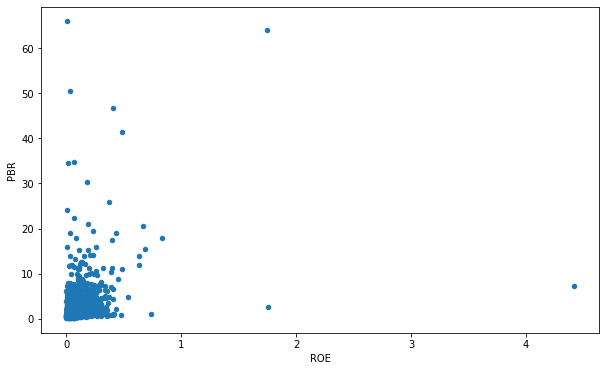

In [21]:
import matplotlib.pyplot as plt

data_market.plot.scatter(figsize=(10, 6), x = 'ROE', y = 'PBR')
plt.show()

`scatter()` 함수는 산점도를 표현하는 함수입니다. $x$축에는 ROE를, $y$축에는 PBR를 입력하면 이에 해당하는 산점도가 표현됩니다. 원하는 그림이 그려지기는 했으나, 극단치 데이터가 있어 둘 사이의 관계가 잘 보이지 않습니다.

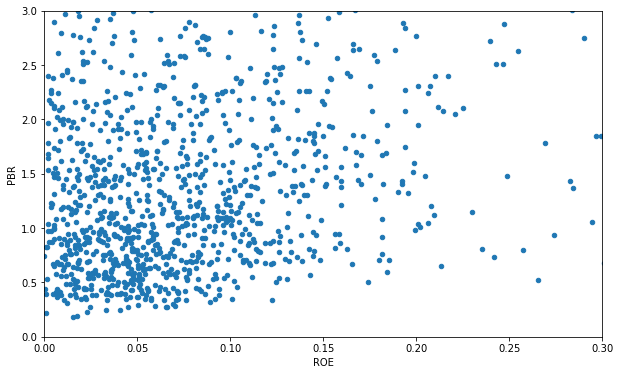

In [22]:
data_market.plot.scatter(figsize=(10, 6), x = 'ROE', y = 'PBR', xlim = [0, 0.3], ylim = [0, 3])
plt.show()

극단치 효과를 제거하기 위해 xlim과 ylim을 통해 $x$축과 $y$의 범위를 직접 지정해줍니다. 극단치가 제거되어 데이터를 더욱 쉽게 확인할 수 있습니다.

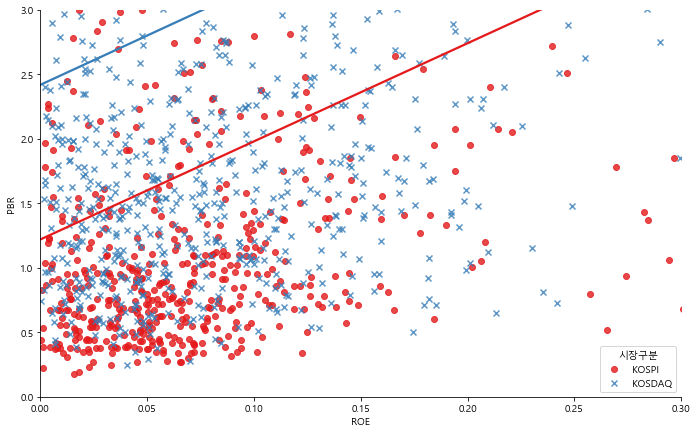

In [23]:
import seaborn as sns

plt.rc('font', family = 'Malgun Gothic') # 한글 폰트 설정
g = sns.lmplot(data = data_market,
               x = 'ROE', 
               y = 'PBR', 
               hue = '시장구분',
               markers=["o", "x"],
               palette="Set1",
               ci = None,
               legend_out = False
              )
g.set(xlim = (0, 0.3), ylim = (0, 3))
g.fig.set_size_inches(10,6)
plt.show()

그룹별로 시각화를 하기 위해서는 seaborn 패키지를 사용해야 합니다. `lmplot()` 함수를 이용하면 산점도와 평활선을 함께 그릴 수 있으며, hue 인자에 그룹을 나누고자 하는 열을 입력합니다. KOSPI와 KOSDAQ 종목의 ROE와 PBR이 각기 다른 색으로 표현되며, 직선을 통해 그 관계를 볼 수 있습니다. 두 시장에 속한 종목 모두 ROE와 PBR은 선형 관계가 있으며, KOSDAQ 종목의 PBR이 더 높습니다.

### 11.2.2 히스토그램 나타내기

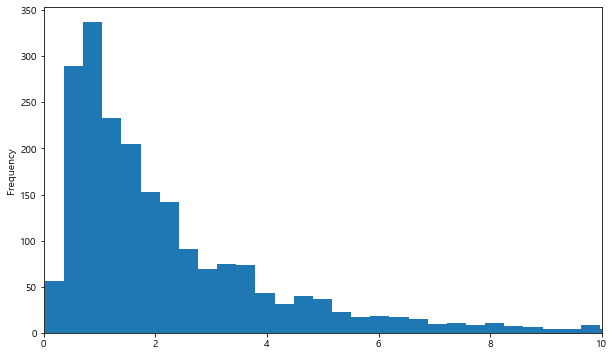

In [24]:
data_market['PBR'].plot.hist(figsize=(10, 6), bins = 2000, xlim = [0, 10])
plt.show()

`hist()` 함수는 히스토그램을 나타내져며, bins 인자는 원하는 구간 수를 입력합니다. 국내 종목들의 PBR 데이터는 왼쪽에 쏠려 있고 오른쪽으로 꼬리가 긴 분포를 가지고 있습니다.

### 11.2.3 박스 플롯 나타내기

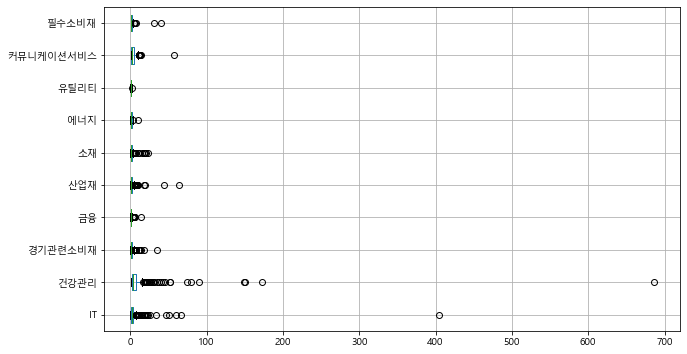

In [25]:
data_market.boxplot(figsize=(10, 6), column = 'PBR', by = 'SEC_NM_KOR', vert = False)
plt.xlabel('')
plt.title('')
plt.suptitle('')
plt.show()

박스 플롯은 데이터의 분포와 이상치를 확인하기 좋은 그림이며, `boxplot()` 함수를 통해 나타낼 수 있습니다. column에는 나타내고자 하는 값이 있는 열은, by에는 그룹을 나누고 싶은 열을 입력하며, vert를 False로 설정하면 $x$축과 $y$축을 뒤집어 표현해줍니다.

결과를 살펴보면 유틸리티나 에너지, 금융 섹터는 PBR이 잘 모여 있는 반면, IT나 건강관리 섹터 등은 매우 극단적인 PBR을 가지고 있는 종목이 있습니다.

### 11.2.4 막대 그래프 나타내기

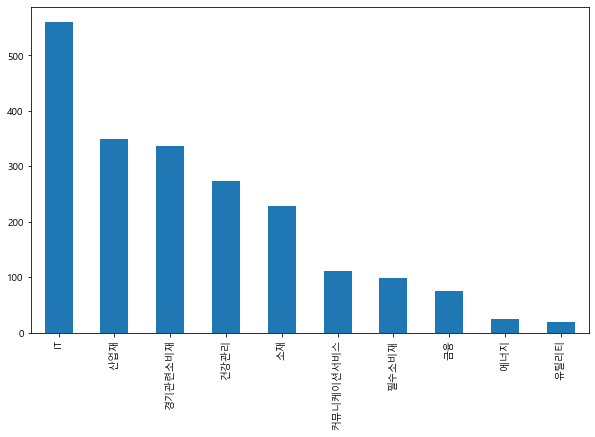

In [26]:
data_market['SEC_NM_KOR'].value_counts().plot.bar(figsize=(10, 6))
plt.show()

`value_counts()` 함수는 그룹별 고유한 값을 계산하는 함수였습니다. 이를 계산한 후 `bar()` 함수를 이용하면 세로 형태의 막대 그래프 형태로 나타낼 수 있습니다. IT 종목이 압도적으로 많은 것이 쉽게 확인됩니다.

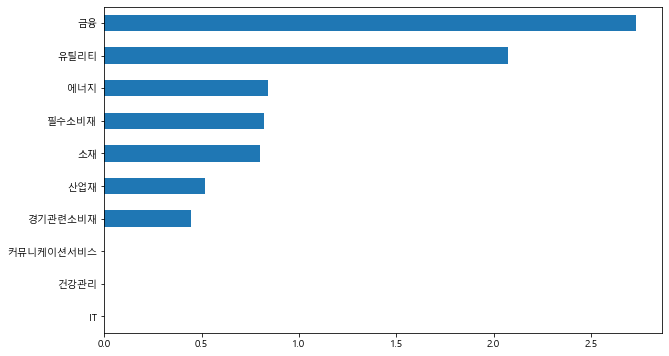

In [27]:
data_market.groupby('SEC_NM_KOR')['배당수익률(%)'].median().sort_values().plot.barh(figsize=(10, 6))
plt.ylabel('')
plt.show()

먼저 각 섹터별 배당수익률의 중앙값을 계산한 후 정렬을 해줍니다. 그 후 `barh()` 함수를 이용하면 가로 형태의 막대 그래프를 나타낼 수 있습니다. 금융, 유틸리티, 에너지 섹터가 배당을 많이주며 건강관리나 IT 섹터는 배당을 거의 주지 않습니다.